In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
kickstarter_cleaned = pd.read_csv('kickstarter_cleaned_index.csv')

In [3]:
new_kickstarter_cleaned = kickstarter_cleaned.drop(columns='Unnamed: 0')

new_kickstarter_cleaned.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real', 'project_length'],
      dtype='object')

## Data Cleaning

In [46]:
new_kickstarter_cleaned.sort_values(by='deadline').tail()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,project_length,month_launched,year_launched
155539,1799225301,"Accurate Beats: My Album ""Collage"" on Vinyl!",Hip-Hop,Music,SEK,2018-03-02,14000.0,2018-01-01 10:35:25,4520.0,live,16,SE,466.86,557.8,1727.69,59 days 13:24:35.000000000,1,2018
101861,1522957960,Tripprapporter - En podcast,Radio & Podcasts,Publishing,SEK,2018-03-02,10000.0,2018-01-01 04:48:46,0.0,live,0,SE,0.00,0.0,1234.07,59 days 19:11:14.000000000,1,2018
224717,22387366,Nerd Collect,Apps,Technology,GBP,2018-03-03,150000.0,2018-01-02 03:26:52,0.0,live,0,GB,0.00,0.0,204596.60,59 days 20:33:08.000000000,1,2018
7091,1036415983,Aikyam : Onnu,Music,Music,USD,2018-03-03,10000.0,2018-01-02 08:11:58,174.0,live,3,US,174.00,174.0,10000.00,59 days 15:48:02.000000000,1,2018
178457,1916988520,Back in Black Hills Movie,Drama,Film & Video,USD,2018-03-03,5500.0,2018-01-02 01:16:16,0.0,live,0,US,0.00,0.0,5500.00,59 days 22:43:44.000000000,1,2018


### Check for Missing Values 

In [4]:
print(kickstarter_cleaned.isnull().any())

ID                  False
name                False
category            False
main_category       False
currency            False
deadline            False
goal                False
launched            False
pledged             False
state               False
backers             False
country             False
usd pledged         False
usd_pledged_real    False
usd_goal_real       False
project_length      False
dtype: bool


### Data Types 

In [5]:
print(new_kickstarter_cleaned.dtypes)

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
project_length       object
dtype: object


We converted deadline and launched date to a date-time type. 

In [9]:
new_kickstarter_cleaned['deadline'] = pd.to_datetime(new_kickstarter_cleaned.deadline)
new_kickstarter_cleaned['launched'] = pd.to_datetime(new_kickstarter_cleaned.launched)
type(new_kickstarter_cleaned.deadline[0])

pandas._libs.tslibs.timestamps.Timestamp

## Summary Statistics 

In [11]:
print(new_kickstarter_cleaned.state.value_counts())

failed        197607
successful    133851
canceled       38751
live            2798
suspended       1842
Name: state, dtype: int64


### Relationships 

In [ ]:
# category, main_category, currency, deadline/launched - year,month

#### Main Category

In [41]:
projects = new_kickstarter_cleaned[(new_kickstarter_cleaned['state'] == 'failed') | (new_kickstarter_cleaned['state'] == 'successful')]

grouped = projects.groupby(['main_category','state']).ID.count()
total = projects.groupby('main_category').state.count()
prop = np.round((grouped/total),2).unstack().sort_values(by='successful')
print(prop.std())
print(prop.mean()) 
#print(prop) # all proportions within 2 std deviations

state
failed        0.141344
successful    0.141344
dtype: float64
state
failed        0.590667
successful    0.409333
dtype: float64


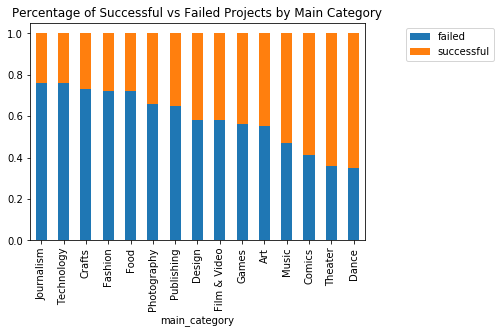

In [27]:
prop.plot(kind='bar',stacked=True)
plt.title('Proportion of Successful vs Failed Projects by Main Category')
plt.legend(loc='upper right',bbox_to_anchor=(1.4,1))
plt.show()

#### Currency 

In [30]:
projects.currency.value_counts()

grouped = projects.groupby(['currency','state']).ID.count()
total = projects.groupby('currency').state.count()
prop = np.round((grouped/total),2).unstack().sort_values(by='successful')

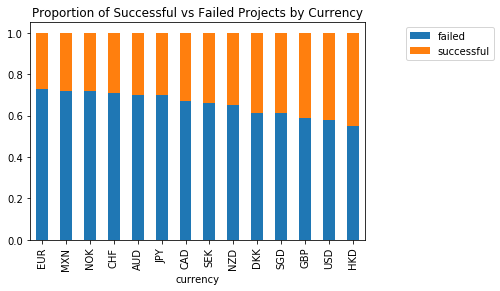

In [32]:
prop.plot(kind='bar',stacked=True)
plt.title('Proportion of Successful vs Failed Projects by Currency')
plt.legend(loc='upper right',bbox_to_anchor=(1.4,1))
plt.show()

#### Launched 

In [62]:
new_kickstarter_cleaned['year_launched'] = new_kickstarter_cleaned.launched.dt.year
new_kickstarter_cleaned['month_launched'] = new_kickstarter_cleaned.launched.dt.month

new_kickstarter_cleaned.year_launched.value_counts().sort_index()
new_kickstarter_cleaned.month_launched.value_counts().sort_index()


1     27491
2     29340
3     33509
4     31845
5     32654
6     32414
7     36097
8     31998
9     30767
10    33175
11    32555
12    23004
Name: month_launched, dtype: int64

In [55]:
projects.year_launched.value_counts().sort_index()

grouped = projects.groupby(['year_launched','state']).ID.count()
total = projects.groupby('year_launched').state.count()
prop = np.round((grouped/total),2).unstack().sort_values(by='successful')
prop = prop.sort_index()
prop

state,failed,successful
year_launched,,
2009,0.51,0.49
2010,0.52,0.48
2011,0.49,0.51
2012,0.54,0.46
2013,0.53,0.47
2014,0.64,0.36
2015,0.68,0.32
2016,0.62,0.38
2017,0.57,0.43


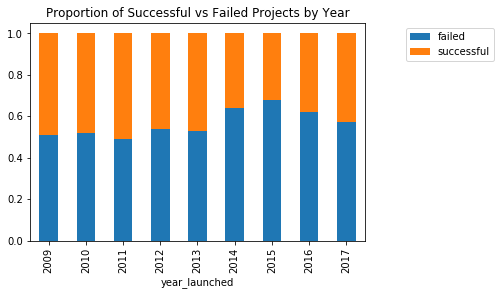

In [57]:
prop.plot(kind='bar',stacked=True)
plt.title('Proportion of Successful vs Failed Projects by Year')
plt.legend(loc='upper right',bbox_to_anchor=(1.4,1))
plt.show()

In [58]:
grouped = projects.groupby(['month_launched','state']).ID.count()
total = projects.groupby('month_launched').state.count()
prop = np.round((grouped/total),2).unstack().sort_values(by='successful')
prop = prop.sort_index()
prop

state,failed,successful
month_launched,,
1,0.61,0.39
2,0.58,0.42
3,0.57,0.43
4,0.58,0.42
5,0.59,0.41
6,0.59,0.41
7,0.64,0.36
8,0.62,0.38
9,0.59,0.41


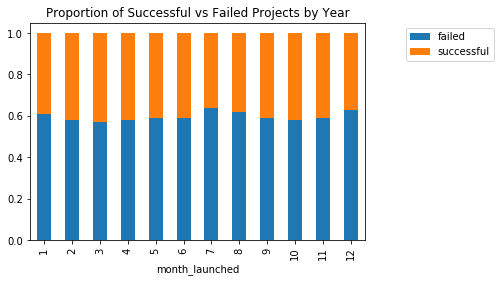

In [59]:
prop.plot(kind='bar',stacked=True)
plt.title('Proportion of Successful vs Failed Projects by Year')
plt.legend(loc='upper right',bbox_to_anchor=(1.4,1))
plt.show()